In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("twitter_dataset.csv") # replace your data

In [9]:
df.head(3)

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19


In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [15]:
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month

In [20]:
monthly_tweets = df.groupby(['year','month']).size().reset_index(name="tweet_counts")

In [21]:
monthly_tweets

,year,month,tweet_counts
0,2023,1,2346
1,2023,2,2076
2,2023,3,2296
3,2023,4,2195
4,2023,5,1087


In [4]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract year and month from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month

# Group by year and month, and count the tweets
monthly_tweets = df.groupby(['Year', 'Month']).size().reset_index(name='Tweet Count')


In [5]:
monthly_tweets

,Year,Month,Tweet Count
0,2023,1,2346
1,2023,2,2076
2,2023,3,2296
3,2023,4,2195
4,2023,5,1087


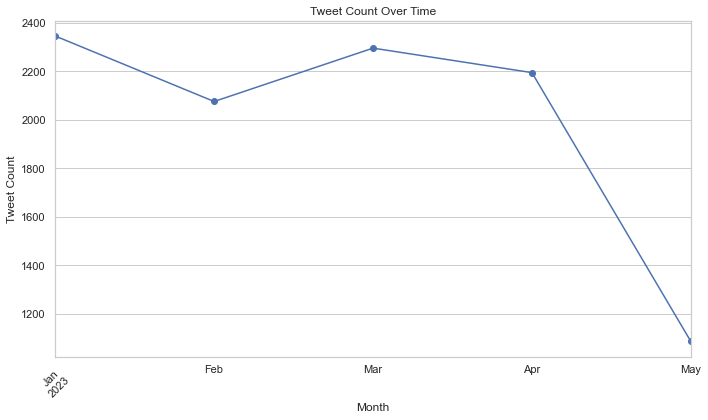

In [61]:
import matplotlib.pyplot as plt

# Plot tweet count over time
plt.figure(figsize=(10, 6))
monthly_tweets.set_index('Year-Month')['Tweet Count'].plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.title('Tweet Count Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensure the labels fit in the plot
plt.show()



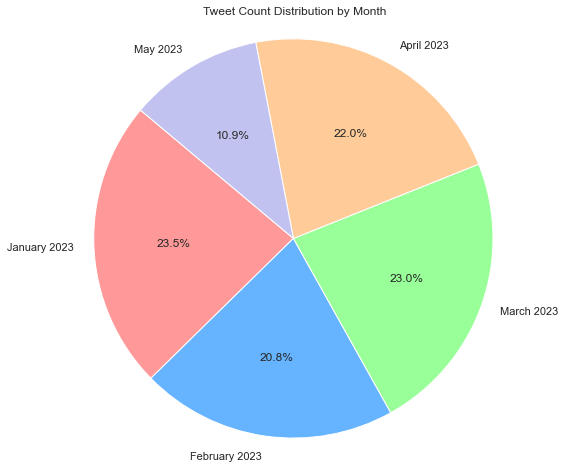

In [63]:
import matplotlib.pyplot as plt

# Data
tweet_counts = monthly_tweets['Tweet Count']
months = monthly_tweets['Year-Month'].dt.strftime('%B %Y')

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
plt.pie(tweet_counts, labels=months, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Tweet Count Distribution by Month')

# Display the plot
plt.show()
